# News Analysis Notebook

This notebook aims to analyze news data, including ratings, traffic, and content. It explores various aspects such as top websites, countries, sentiment analysis, and topic distribution.

# 1. Importing Libraries and Loading Data


In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sys
sys.path.append('../')

from src.utils import create_bar_plot, map_country_to_region, plot_sentiment_distribution_for_top_sources, preprocess_text, fit_tokenizer, seq_and_pad, tokenize_labels
from src.loader import load_csv_file

2024-04-11 20:32:15.529769: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-11 20:32:19.083684: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-11 20:32:30.092119: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/yohanes/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/yohanes/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/yohanes/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
# File paths
rating_path = '../data/rating.csv'
traffic_path = '../data/traffic.csv'
data_path = '../data/data.csv'
loc_path = '../data/domains_location.csv'

In [ ]:
# Load data from CSV files
rating_df = load_csv_file(rating_path)
traffic_df = load_csv_file(traffic_path)
data_df = load_csv_file(data_path)
loc_df = load_csv_file(loc_path)

# 2. Data Exploration and Preprocessing

In [ ]:
# Top 10 websites with the largest count of news articles
traffic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 12 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   GlobalRank      1000000 non-null  int64 
 1   TldRank         1000000 non-null  int64 
 2   Domain          1000000 non-null  object
 3   TLD             1000000 non-null  object
 4   RefSubNets      1000000 non-null  int64 
 5   RefIPs          1000000 non-null  int64 
 6   IDN_Domain      1000000 non-null  object
 7   IDN_TLD         1000000 non-null  object
 8   PrevGlobalRank  1000000 non-null  int64 
 9   PrevTldRank     1000000 non-null  int64 
 10  PrevRefSubNets  1000000 non-null  int64 
 11  PrevRefIPs      1000000 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 91.6+ MB


In [ ]:
# Check info of rating dataframe
rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58356 entries, 0 to 58355
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   article_id       58356 non-null  int64 
 1   source_id        17771 non-null  object
 2   source_name      58356 non-null  object
 3   author           56193 non-null  object
 4   title            58356 non-null  object
 5   description      58346 non-null  object
 6   url              58356 non-null  object
 7   url_to_image     54905 non-null  object
 8   published_at     58356 non-null  object
 9   content          58356 non-null  object
 10  category         58335 non-null  object
 11  article          58356 non-null  object
 12  title_sentiment  58356 non-null  object
dtypes: int64(1), object(12)
memory usage: 5.8+ MB


In [ ]:
# Check for missing values in rating dataframe
rating_df.isnull().sum()

article_id             0
source_id          40585
source_name            0
author              2163
title                  0
description           10
url                    0
url_to_image        3451
published_at           0
content                0
category              21
article                0
title_sentiment        0
dtype: int64

In [ ]:
# Check info of location dataframe
loc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37802 entries, 0 to 37801
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   SourceCommonName  37802 non-null  object
 1   location          37802 non-null  object
 2   Country           37801 non-null  object
dtypes: object(3)
memory usage: 886.1+ KB


In [ ]:
# Check info of data dataframe
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105375 entries, 0 to 105374
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   article_id    105375 non-null  int64 
 1   source_id     24495 non-null   object
 2   source_name   105375 non-null  object
 3   author        97156 non-null   object
 4   title         105335 non-null  object
 5   description   104992 non-null  object
 6   url           105375 non-null  object
 7   url_to_image  99751 non-null   object
 8   published_at  105375 non-null  object
 9   content       105375 non-null  object
 10  category      105333 non-null  object
 11  full_content  58432 non-null   object
dtypes: int64(1), object(11)
memory usage: 9.6+ MB


In [ ]:
# Check for missing values in data dataframe
data_df.isnull().sum()

article_id          0
source_id       80880
source_name         0
author           8219
title              40
description       383
url                 0
url_to_image     5624
published_at        0
content             0
category           42
full_content    46943
dtype: int64

## Top and Bottom Analysis of News Websites

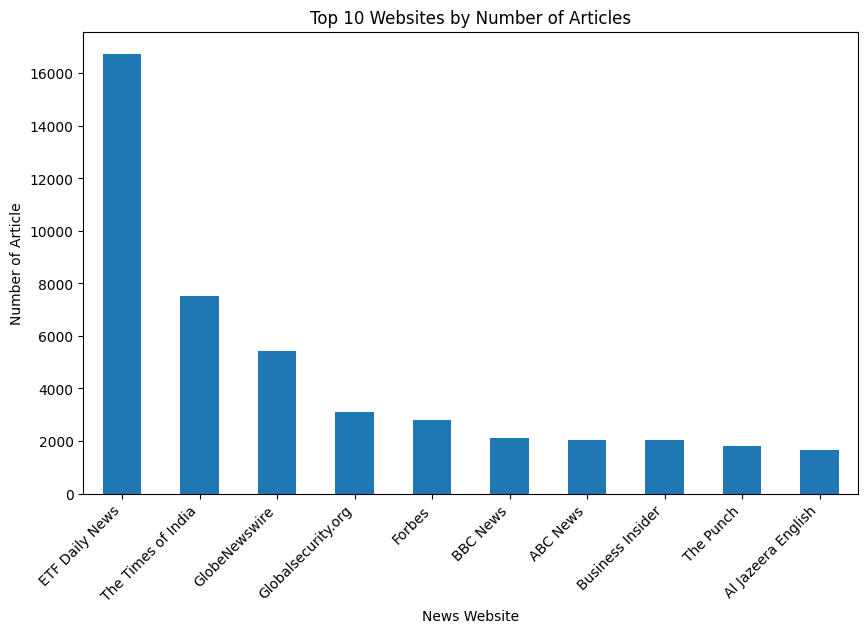

In [ ]:
#Top 10 websites that have the largest count of news articles
top_10_web = rating_df['source_name'].value_counts().head(10)

create_bar_plot(top_10_web, 'Top 10 Websites by Number of Articles', 'News Website', 'Number of Article')


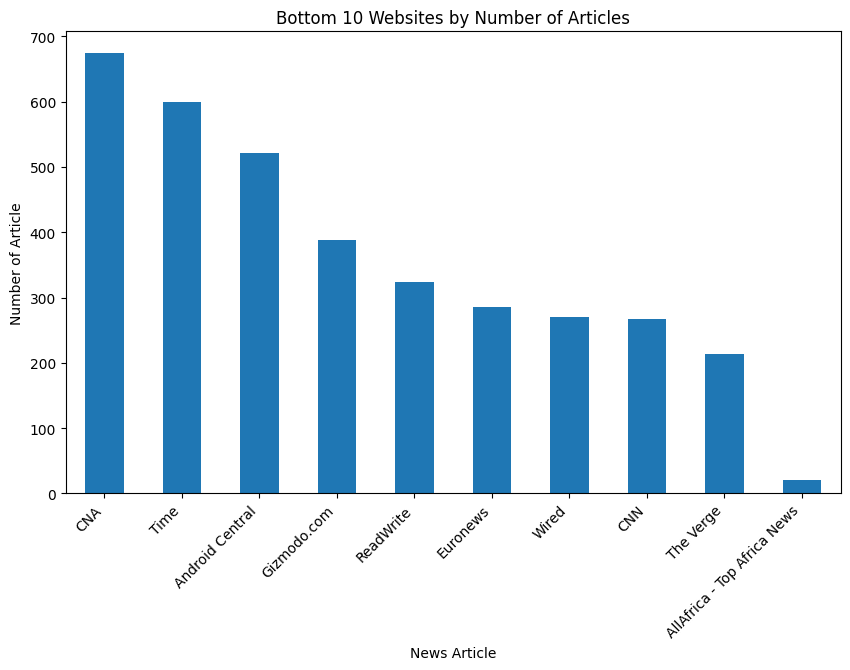

In [ ]:
#Bottom 10 websites that have the smallest count of news articles
bottom_10_web = rating_df['source_name'].value_counts().tail(10)

create_bar_plot(bottom_10_web, 'Bottom 10 Websites by Number of Articles', 'News Article', 'Number of Article')


## Analysis by Country

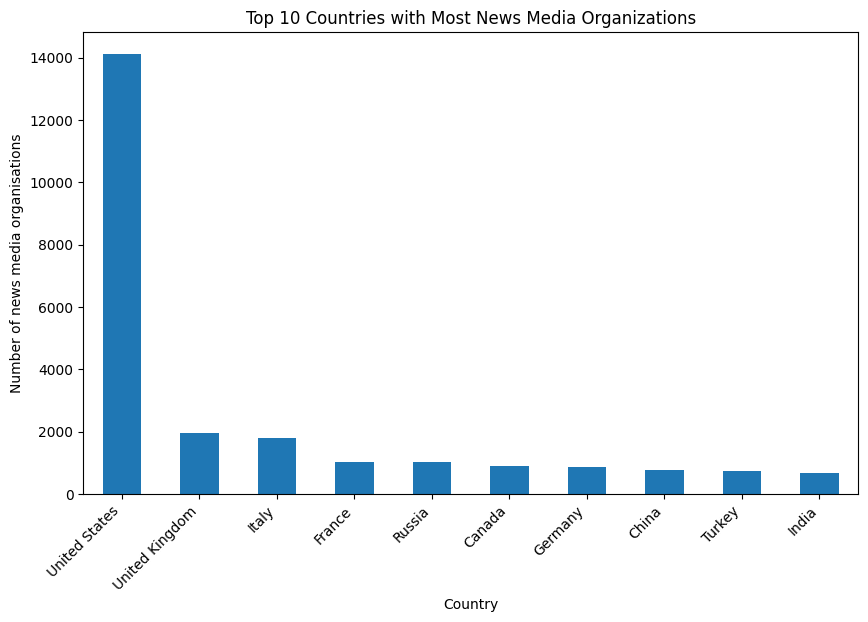

In [ ]:
# Top 10 Countries with the highest number of news media organisations
Top_10_country = loc_df.groupby('Country')['SourceCommonName'].count().sort_values(ascending=False).head(10)

create_bar_plot(Top_10_country, 'Top 10 Countries with Most News Media Organizations', 'Country', 'Number of news media organisations')

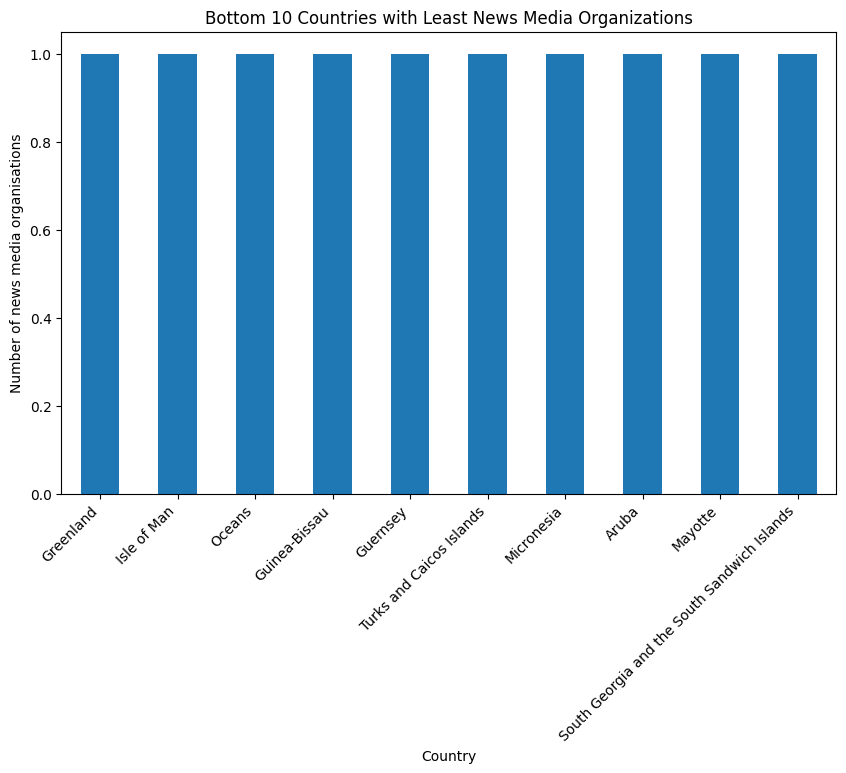

In [ ]:
# Bottom 10 Countries with the lowest number of news media organisations
Bottom_10_country = loc_df.groupby('Country')['SourceCommonName'].count().sort_values().head(10)

create_bar_plot(Bottom_10_country, 'Bottom 10 Countries with Least News Media Organizations', 'Country', 'Number of news media organisations')

## Analysis by Article Content

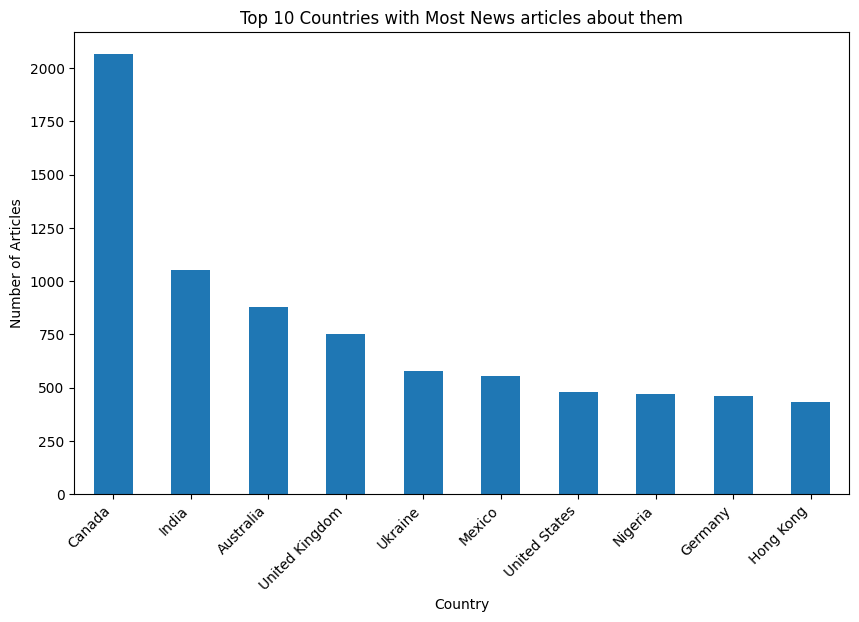

In [ ]:
# Top 10 Countries that have many articles written about them
countries = loc_df['Country'].tolist()
rating_country = rating_df[rating_df['category'].isin(countries)]

Top_10_country_art = rating_country['category'].value_counts()[:10]

create_bar_plot(Top_10_country_art, 'Top 10 Countries with Most News articles about them', 'Country', 'Number of Articles')

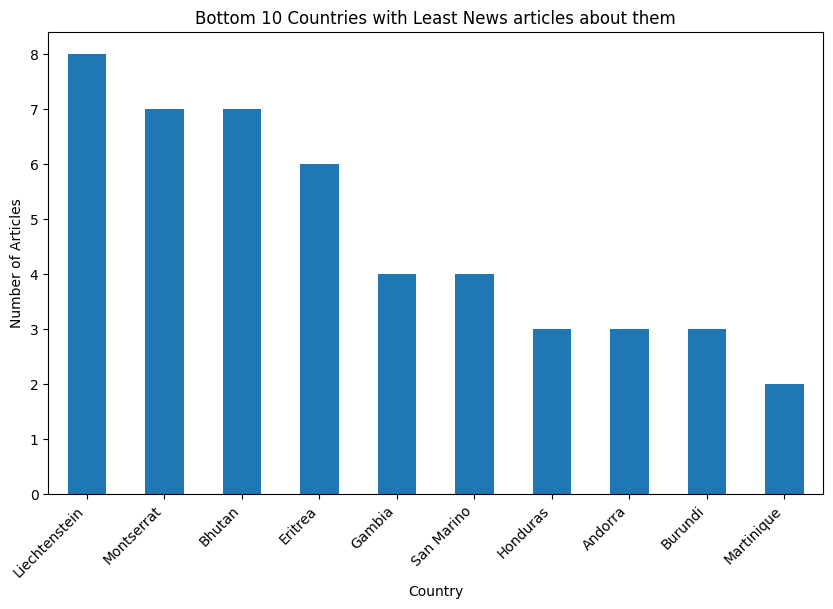

In [ ]:
# Bottom 10 Countries that have least articles written about them
Bottom_10_country_art = rating_country['category'].value_counts()[-10:]

create_bar_plot(Bottom_10_country_art, 'Bottom 10 Countries with Least News articles about them', 'Country', 'Number of Articles')

In [ ]:
# Adding sentiment analysis to rating dataframe
rating_df['region'] = rating_df['category'].apply(map_country_to_region)

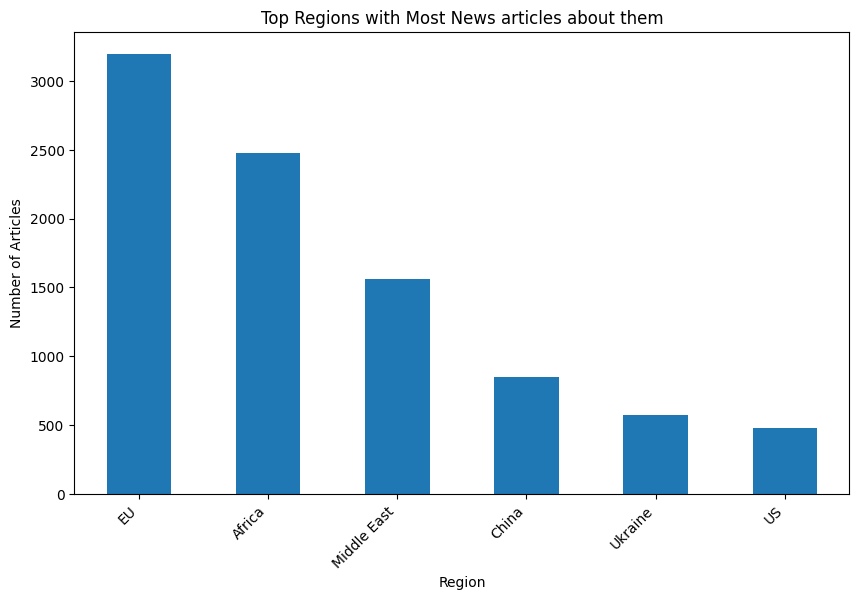

In [ ]:
# Top Regions that have many articles written about them
Top_region_art = rating_df['region'].value_counts()

create_bar_plot(Top_region_art, 'Top Regions with Most News articles about them', 'Region', 'Number of Articles')

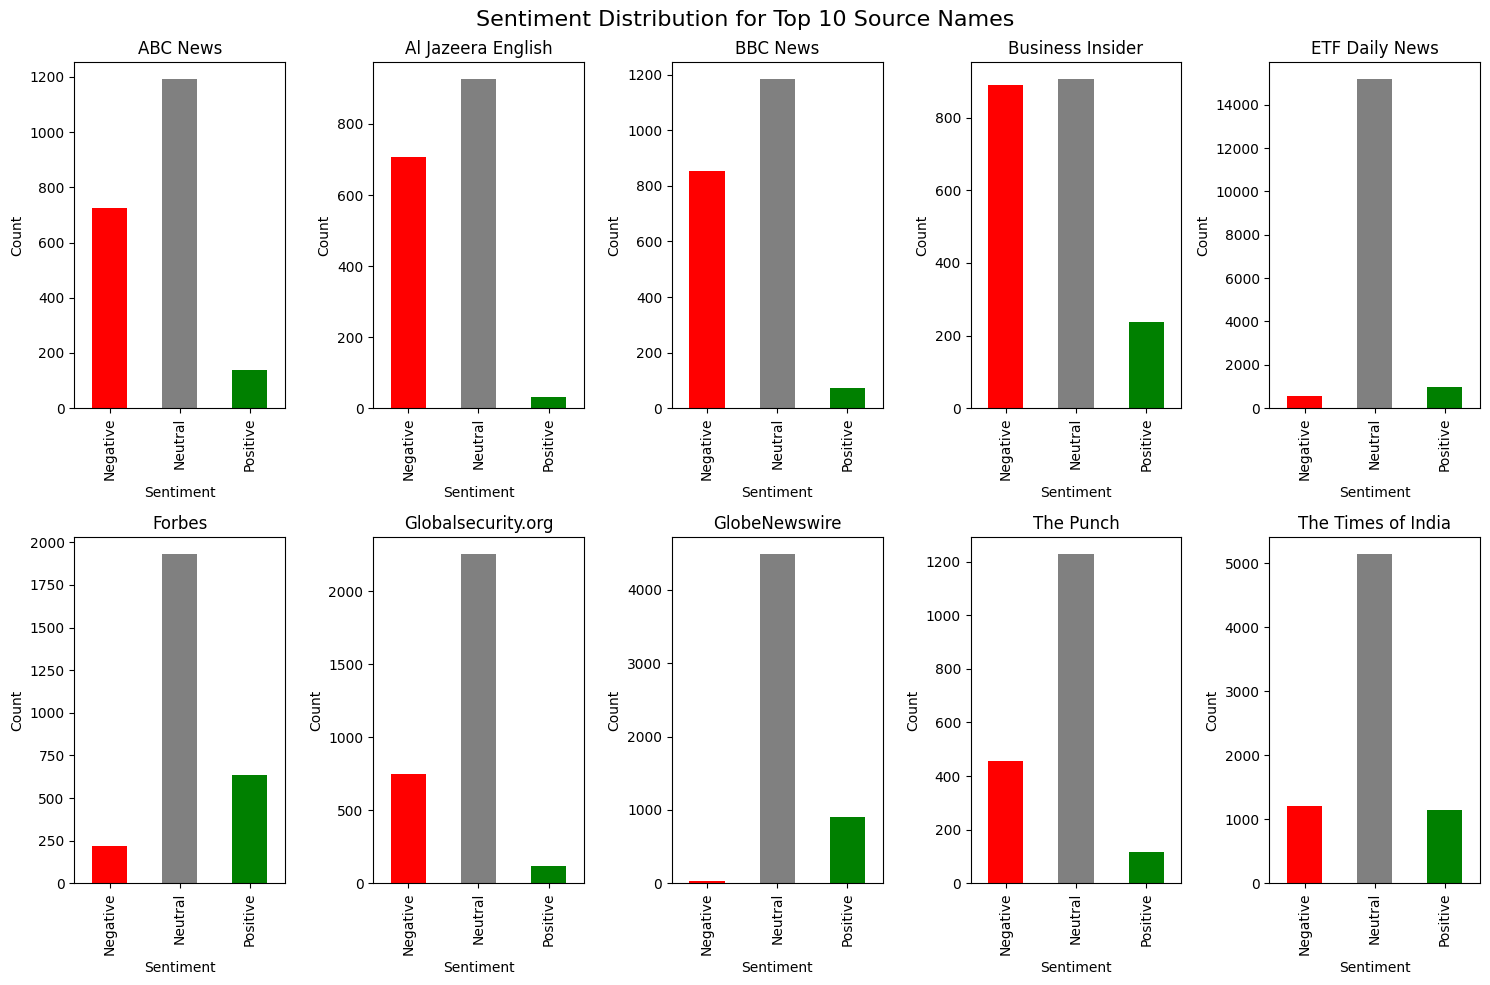

In [ ]:
# Top 10 sources with count of positive, neutral, and negative sentiment
top_10_sources = top_10_web.index.tolist()

plot_sentiment_distribution_for_top_sources(rating_df, top_10_sources, sentiment_column="title_sentiment")

## Sentiment Analysis

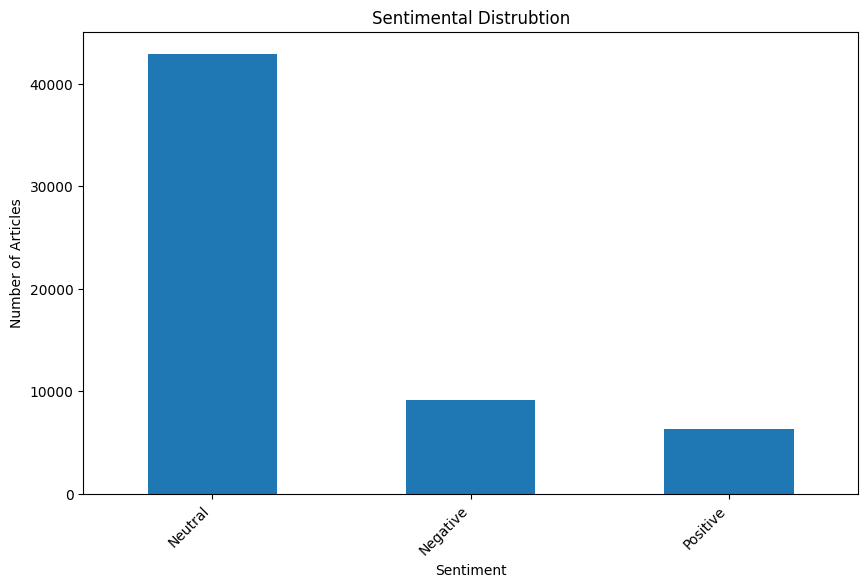

In [ ]:
# Sentimental Distrubtion
sentiment_count = rating_df['title_sentiment'].value_counts()

create_bar_plot(sentiment_count, 'Sentimental Distrubtion', 'Sentiment', 'Number of Articles')

# 3.  Topic Modeling

In [ ]:
# Import neccesary library for topic modeling
import json
import gensim.corpora as corpora
from gensim.models import LdaModel
import matplotlib.dates as mdates  # For date formatting

In [ ]:
# loading model configuration from config.json
with open('../config.json', 'r') as f:
    config = json.load(f)

In [ ]:
# Preprocess text data
rating_df['cleaned_article'] = rating_df['article'].apply(preprocess_text)
rating_df['cleaned_title'] = rating_df['title'].apply(preprocess_text)

In [ ]:
# Combine title and article text
text = rating_df['cleaned_title'] + ' ' + rating_df['cleaned_article']

# Combine title and article text
tokenized_text = [doc.split() for doc in text]

# Tokenize text data
tokenized_text = [doc.split() for doc in text]

# Create dictionary and document-term matrix
dictionary = corpora.Dictionary(tokenized_text)
doc_term_matrix = [dictionary.doc2bow(doc) for doc in tokenized_text]

In [ ]:
# Perform LSA (Latent Semantic Analysis) topic modeling
num_topics = config['num_topics']
lda =LdaModel(doc_term_matrix, num_topics = num_topics, id2word = dictionary)
lda.print_topics()

[(0,
  '0.053*"operatives" + 0.040*"X" + 0.039*"oil" + 0.035*"arrested" + 0.035*"suspects" + 0.015*"suspect" + 0.015*"crude" + 0.015*"confessed" + 0.014*"command" + 0.012*"recovered"'),
 (1,
  '0.053*"shares" + 0.038*"stock" + 0.032*"quarter" + 0.023*"company" + 0.023*"rating" + 0.020*"price" + 0.016*"average" + 0.015*"ratio" + 0.015*"companys" + 0.013*"owns"'),
 (2,
  '0.010*"said" + 0.009*"also" + 0.009*"development" + 0.007*"countries" + 0.007*"support" + 0.006*"project" + 0.006*"security" + 0.006*"government" + 0.006*"economic" + 0.005*"global"'),
 (3,
  '0.007*"data" + 0.007*"new" + 0.007*"technology" + 0.006*"use" + 0.005*"also" + 0.005*"users" + 0.004*"like" + 0.004*"digital" + 0.004*"platform" + 0.004*"experience"'),
 (4,
  '0.014*"South" + 0.011*"Asia" + 0.008*"Australia" + 0.006*"first" + 0.006*"Officer" + 0.005*"also" + 0.005*"new" + 0.005*"series" + 0.005*"year" + 0.005*"film"'),
 (5,
  '0.026*"said" + 0.010*"people" + 0.010*"military" + 0.010*"war" + 0.007*"hostages" + 0.0

In [ ]:
# Assign dominant topic to each document
topic_distributions = lda.get_document_topics(doc_term_matrix)

rating_df['dominant_topic'] = [max(t, key=lambda x: x[1])[0] for t in topic_distributions]

In [ ]:
# Calculate topic diversity for each website
website_groups = rating_df.groupby('source_name')
topic_diversity = website_groups['dominant_topic'].nunique()

# Rank websites based on topic diversity
ranked_websites = topic_diversity.sort_values(ascending=False)


## Topic Distribution Across Top Websites

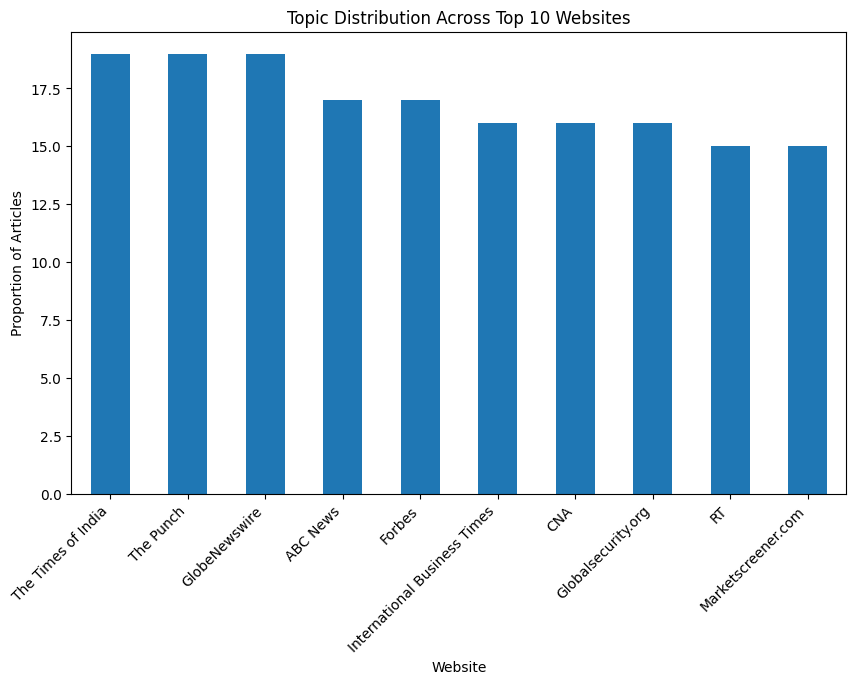

In [ ]:
create_bar_plot(ranked_websites.head(10), 'Topic Distribution Across Top 10 Websites', 'Website', 'Proportion of Articles')

<Figure size 1000x600 with 0 Axes>

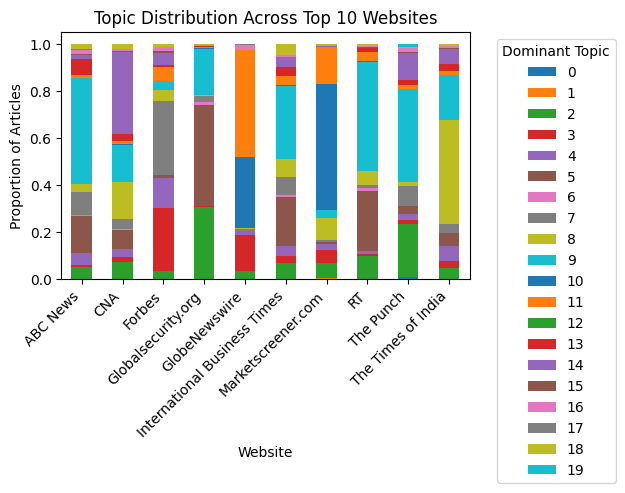

In [ ]:
# Select the top 10 websites from your DataFrame
top_10_websites = ranked_websites.head(10)
top_10_data = rating_df[rating_df['source_name'].isin(top_10_websites.index)]

# Group data by website and dominant topic, then count the number of articles in each group
grouped_data = top_10_data.groupby(['source_name', 'dominant_topic']).size().unstack(fill_value=0)

# Plot stacked bar chart
plt.figure(figsize=(10, 6))
grouped_data.div(grouped_data.sum(axis=1), axis=0).plot(kind='bar', stacked=True)
plt.title('Topic Distribution Across Top 10 Websites')
plt.xlabel('Website')
plt.ylabel('Proportion of Articles')
plt.legend(title='Dominant Topic', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Topic Trends Over Time

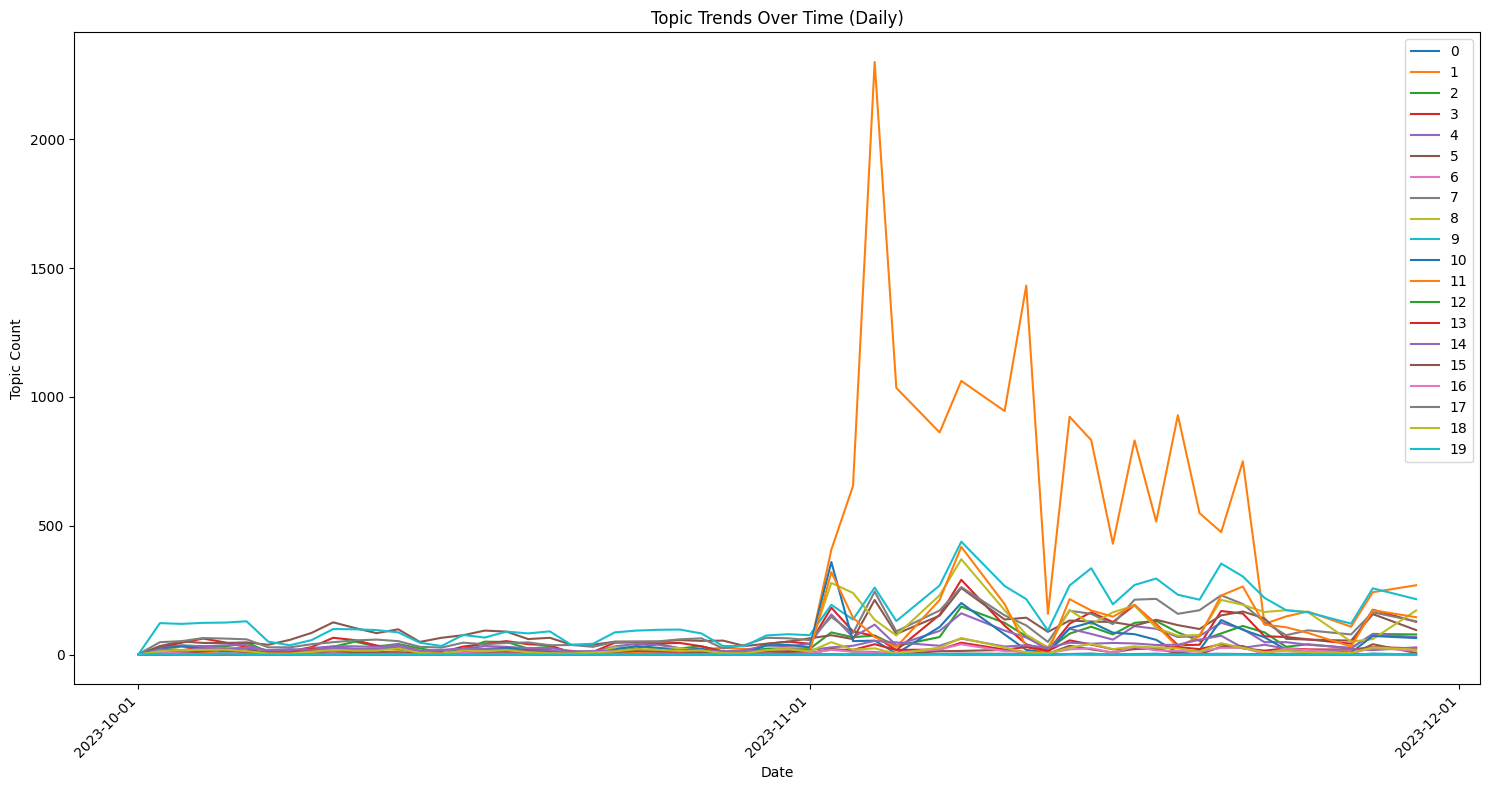

In [ ]:
# Convert 'published_at' to datetime
rating_df['published_at'] = pd.to_datetime(rating_df['published_at'], format='ISO8601')

# Group data by day and dominant topic, calculate topic counts
grouped_data = (
    rating_df.groupby([rating_df['published_at'].dt.to_period('D'), 'dominant_topic'])
    .size()
    .unstack(fill_value=0)
)



# Create the line plot with daily dates
fig, ax = plt.subplots(figsize=(15, 8))

# Iterate through dominant topics and plot lines
for topic in grouped_data.columns:
    dates = grouped_data.index.to_timestamp()  # Extract daily date values
    counts = grouped_data[topic]  # Extract topic counts for this topic
    plt.plot(dates, counts, label=topic)  # Plot line with label

# Format date on x-axis (daily format)
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonthday=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability

# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Topic Count')
plt.title('Topic Trends Over Time (Daily)')
plt.legend()  # Show legend for different topics

plt.tight_layout()
plt.show()

# Sentiment Analysis with Machine Learning

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

from tensorflow.keras.layers import Dense,Input, Embedding,LSTM,Dropout,Conv1D, MaxPooling1D, GlobalMaxPooling1D,Dropout,Bidirectional,Flatten,BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [ ]:
NUM_WORDS = config['NUM_WORDS']
EMBEDDING_DIM = config['EMBEDDING_DIM']
MAXLEN = config['MAXLEN']
PADDING = config['PADDING']
OOV_TOKEN = config['OOV_TOKEN']
EPOCHS = config['EPOCHS']

In [ ]:
# Split data into training and testing sets
train_text, test_text, train_labels, test_labels = train_test_split(rating_df["cleaned_article"],rating_df["title_sentiment"], test_size=0.3, random_state=42)

In [ ]:
# Fit tokenizer on training text
tokenizer =  fit_tokenizer(train_text, NUM_WORDS, OOV_TOKEN)
word_index = tokenizer.word_index

print(f"Vocabulary contains {len(word_index)} words\n")
print(" token included in vocabulary" if "" in word_index else " token NOT included in vocabulary")

In [ ]:
# Sequence and pad training and testing text data
train_padded_seq = seq_and_pad(train_text, tokenizer, PADDING, MAXLEN)
test_padded_seq = seq_and_pad(test_text, tokenizer, PADDING, MAXLEN)

In [ ]:
print(f"Padded training sequences have shape: {train_padded_seq.shape}\n")
print(f"Padded validation sequences have shape: {test_padded_seq.shape}")

Padded training sequences have shape: (40849, 3000)

Padded validation sequences have shape: (17507, 3000)


In [ ]:
# Tokenize labels
train_label_seq = tokenize_labels(rating_df['title_sentiment'], train_labels)
test_label_seq = tokenize_labels(rating_df['title_sentiment'], test_labels)

In [ ]:
print(f"First 5 labels of the training set should look like this:\n{train_label_seq[:5]}\n")
print(f"First 5 labels of the validation set should look like this:\n{test_label_seq[:5]}\n")
print(f"Tokenized labels of the training set have shape: {train_label_seq.shape}\n")
print(f"Tokenized labels of the validation set have shape: {test_label_seq.shape}\n")

First 5 labels of the training set should look like this:
[[0]
 [0]
 [1]
 [0]
 [0]]

First 5 labels of the validation set should look like this:
[[2]
 [0]
 [0]
 [0]
 [2]]

Tokenized labels of the training set have shape: (40849, 1)

Tokenized labels of the validation set have shape: (17507, 1)



In [ ]:
# Define the model architecture
model = tf.keras.Sequential([
    Embedding(input_dim=NUM_WORDS, output_dim=EMBEDDING_DIM, input_length=MAXLEN),
    Conv1D(filters=32, kernel_size=3, activation='relu'),  # 1D convolution
    MaxPooling1D(pool_size=2),  # Max pooling for dimensionality reduction
    Conv1D(filters=64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),  # Flatten for dense layers
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

# Compile the model
model.compile(loss='sparse_categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

# Train the model
history = model.fit(
    train_padded_seq,
    train_label_seq,
    epochs=EPOCHS,
    validation_data=(test_padded_seq, test_label_seq)
)

Epoch 1/25
1277/1277 [==============================] - 395s 308ms/step - loss: 0.5682 - accuracy: 0.7621 - val_loss: 0.4957 - val_accuracy: 0.7829
Epoch 2/25
1277/1277 [==============================] - 386s 303ms/step - loss: 0.4043 - accuracy: 0.8249 - val_loss: 0.5214 - val_accuracy: 0.7836
Epoch 3/25
1277/1277 [==============================] - 386s 302ms/step - loss: 0.2435 - accuracy: 0.9022 - val_loss: 0.6362 - val_accuracy: 0.7799
Epoch 4/25
1277/1277 [==============================] - 386s 302ms/step - loss: 0.1125 - accuracy: 0.9604 - val_loss: 0.8485 - val_accuracy: 0.7746
Epoch 5/25
1277/1277 [==============================] - 386s 303ms/step - loss: 0.0636 - accuracy: 0.9775 - val_loss: 1.1587 - val_accuracy: 0.7752
Epoch 6/25
1277/1277 [==============================] - 392s 307ms/step - loss: 0.0488 - accuracy: 0.9838 - val_loss: 1.4020 - val_accuracy: 0.7737
Epoch 7/25
1277/1277 [==============================] - 384s 301ms/step - loss: 0.0418 - accuracy: 0.9867 - val_